In [51]:
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [40]:
connection = sqlite3.connect("../db.sqlite3")
cursor = connection.cursor()
rows = cursor.execute("SELECT restaurant_orderitem.quantity, restaurant_product.price, restaurant_product.name, restaurant_order.datetime "
                      "FROM restaurant_orderitem "
                      "INNER JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id "
                      "INNER JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id").fetchall()

with open('restaurant.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["quantity", "product_price", "product_name", "order_time"]

    writer.writerow(field)
    writer.writerows(rows)

df = pd.read_csv("restaurant.csv")
df

,quantity,product_price,product_name,order_time
0,2,0.80,Plain Papadum,2019-08-03 20:25:00
1,1,12.95,King Prawn Balti,2019-08-03 20:25:00
2,1,2.95,Garlic Naan,2019-08-03 20:25:00
3,1,3.95,Mushroom Rice,2019-08-03 20:25:00
4,1,8.95,Paneer Tikka Masala,2019-08-03 20:25:00
...,...,...,...,...
74813,2,17.95,House Red wine 75cl,2016-05-18 18:53:00
74814,2,17.95,House Red wine 75cl,2016-05-14 19:28:00
74815,2,17.95,House Red wine 75cl,2016-05-10 13:18:00
74816,1,17.95,House white wine 75cl,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

array([<Axes: ylabel='quantity'>], dtype=object)

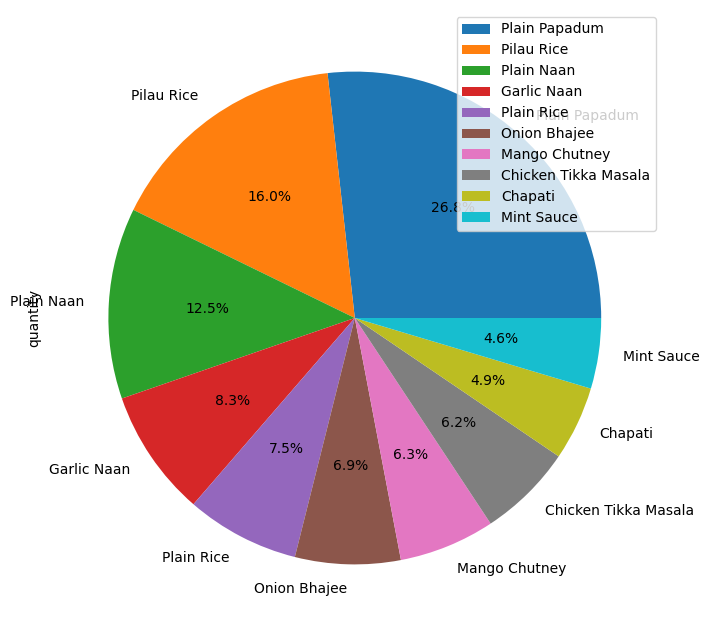

In [4]:
popular_products = df[["product_name", "quantity"]].groupby("product_name").sum().nlargest(10, "quantity")
popular_products.plot.pie(figsize=(10, 8), subplots=True, autopct="%1.1f%%")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

array([<Axes: ylabel='item_price'>], dtype=object)

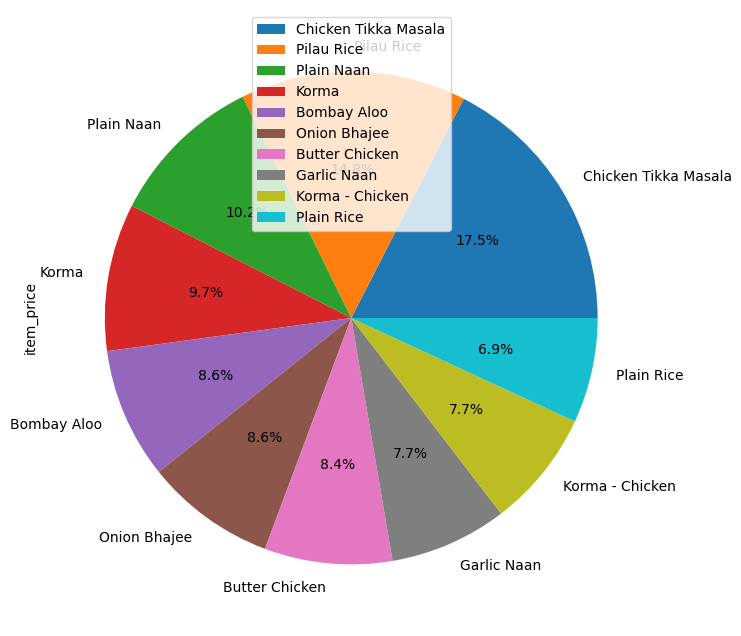

In [41]:
df["item_price"] = df["product_price"] * df["quantity"]
ten_income_products = df[["product_name", "item_price"]].groupby("product_name").sum().nlargest(10, "item_price")
ten_income_products.plot.pie(figsize=(10, 8), subplots=True, autopct="%1.1f%%")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [44]:
df

,quantity,product_price,product_name,order_time,item_price
0,2,0.80,Plain Papadum,2019-08-03 20:25:00,1.60
1,1,12.95,King Prawn Balti,2019-08-03 20:25:00,12.95
2,1,2.95,Garlic Naan,2019-08-03 20:25:00,2.95
3,1,3.95,Mushroom Rice,2019-08-03 20:25:00,3.95
4,1,8.95,Paneer Tikka Masala,2019-08-03 20:25:00,8.95
...,...,...,...,...,...
74813,2,17.95,House Red wine 75cl,2016-05-18 18:53:00,35.90
74814,2,17.95,House Red wine 75cl,2016-05-14 19:28:00,35.90
74815,2,17.95,House Red wine 75cl,2016-05-10 13:18:00,35.90
74816,1,17.95,House white wine 75cl,2016-04-07 19:04:00,17.95


<Axes: xlabel='order_time'>

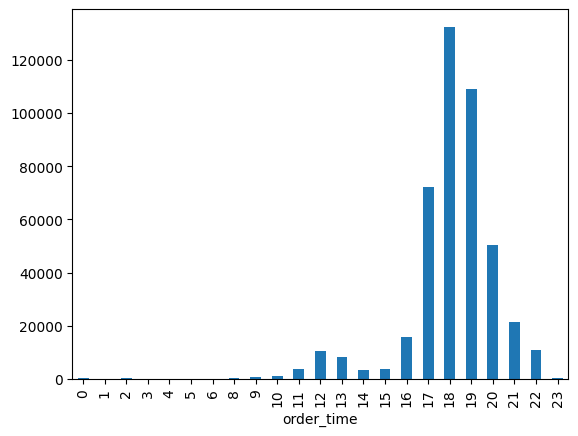

In [46]:
df["order_time"] = pd.to_datetime(df["order_time"])
hourly_income = df.groupby(df["order_time"].dt.hour).sum("item_price")
hourly_income["item_price"].plot.bar()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<BarContainer object of 7 artists>

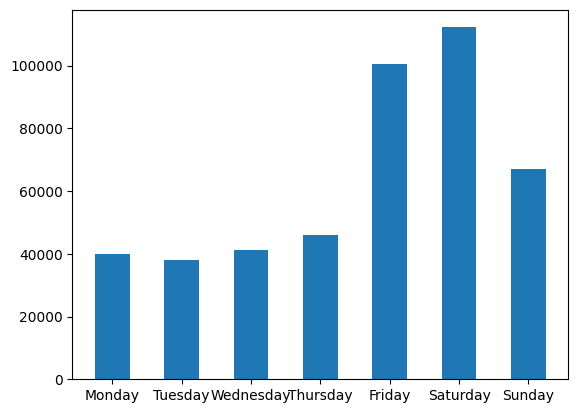

In [55]:
day_income = df.groupby(df["order_time"].dt.weekday).sum("item_price")
labels =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.bar(labels, day_income["item_price"], width=0.5)